Regresión no lineal

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
%load_ext rpy2.ipython

In [4]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('datos_cuentas.csv', encoding = 'latin1')
df.head(5)



<ipython-input-4-1f9dfd1344e8>:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('datos_cuentas.csv', encoding = 'latin1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [5]:
df.columns

Index(['folio', 'tag', 'folio_solicitud', 'fecha', 'marca', 'modelo', 'plazo',
       'precio', 'enganche', 'descuento', 'semana', 'monto_financiado',
       'costo_total', 'monto_accesorios', 'agente_venta', 'dis_venta',
       'status', 'fraude', 'empresa', 'inversion', 'pagos_realizados',
       'reautorizacion', 'fecha_ultimo_pago', 'fecha_pago_proximo',
       'status_cuenta', 'puntos', 'riesgo', 'score_buro', 'razones_buro',
       'porc_eng', 'limite_credito', 'semana_actual', 'cp_cliente',
       'edad_cliente', 'cd_cliente', 'edo_cliente', 'cd_venta', 'edo_venta',
       'curp'],
      dtype='object')

In [6]:
df1 = df[['precio', 'enganche', 'semana', 'monto_financiado', 'costo_total', 'riesgo',
          'score_buro', 'porc_eng', 'edad_cliente']]
df1[(df1['porc_eng']<500)]

,precio,enganche,semana,monto_financiado,costo_total,riesgo,score_buro,porc_eng,edad_cliente
0,1949.0,780.0,81,1169.0,2106,0.00,0,40.02,23.0
1,2999.0,1050.0,225,1949.0,2925,0.00,0,35.01,60.0
2,1959.0,490.0,170,1469.0,2210,0.00,0,25.01,58.0
3,1959.0,490.0,170,1469.0,2210,0.00,0,25.01,42.0
4,4299.0,1075.0,178,3224.0,6942,0.00,0,25.01,33.0
...,...,...,...,...,...,...,...,...,...
22730,3349.0,297.0,211,3052.0,5486,27.40,469,8.87,22.0
22731,4100.0,1209.0,200,2891.0,5200,19.00,502,29.49,27.0
22732,4849.0,1152.0,256,3697.0,6656,26.65,459,23.76,36.0
22733,9799.0,2799.0,386,7000.0,15054,-17.35,699,28.56,53.0


In [7]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=df1.corr()
Corr_Factors

,precio,enganche,semana,monto_financiado,costo_total,riesgo,score_buro,porc_eng,edad_cliente
precio,1.000000,0.678519,0.672673,0.947080,0.872403,-0.042888,0.080220,-0.011328,-0.017584
enganche,0.678519,1.000000,0.339912,0.408276,0.355694,0.272575,0.059764,0.676520,-0.013918
semana,0.672673,0.339912,1.000000,0.688111,0.411911,-0.091175,0.072555,-0.158246,-0.018356
monto_financiado,0.947080,0.408276,0.688111,1.000000,0.929859,-0.169037,0.076027,-0.307681,-0.014615
costo_total,0.872403,0.355694,0.411911,0.929859,1.000000,-0.171733,0.060079,-0.305885,-0.008484
riesgo,-0.042888,0.272575,-0.091175,-0.169037,-0.171733,1.000000,-0.067350,0.474009,0.019933
score_buro,0.080220,0.059764,0.072555,0.076027,0.060079,-0.067350,1.000000,0.006687,-0.028246
porc_eng,-0.011328,0.676520,-0.158246,-0.307681,-0.305885,0.474009,0.006687,1.000000,-0.004220
edad_cliente,-0.017584,-0.013918,-0.018356,-0.014615,-0.008484,0.019933,-0.028246,-0.004220,1.000000


In [8]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,precio,enganche,semana,monto_financiado,costo_total,riesgo,score_buro,porc_eng,edad_cliente
precio,1.000000,0.678519,0.672673,0.947080,0.872403,0.042888,0.080220,0.011328,0.017584
enganche,0.678519,1.000000,0.339912,0.408276,0.355694,0.272575,0.059764,0.676520,0.013918
semana,0.672673,0.339912,1.000000,0.688111,0.411911,0.091175,0.072555,0.158246,0.018356
monto_financiado,0.947080,0.408276,0.688111,1.000000,0.929859,0.169037,0.076027,0.307681,0.014615
costo_total,0.872403,0.355694,0.411911,0.929859,1.000000,0.171733,0.060079,0.305885,0.008484
riesgo,0.042888,0.272575,0.091175,0.169037,0.171733,1.000000,0.067350,0.474009,0.019933
score_buro,0.080220,0.059764,0.072555,0.076027,0.060079,0.067350,1.000000,0.006687,0.028246
porc_eng,0.011328,0.676520,0.158246,0.307681,0.305885,0.474009,0.006687,1.000000,0.004220
edad_cliente,0.017584,0.013918,0.018356,0.014615,0.008484,0.019933,0.028246,0.004220,1.000000


<Axes: >

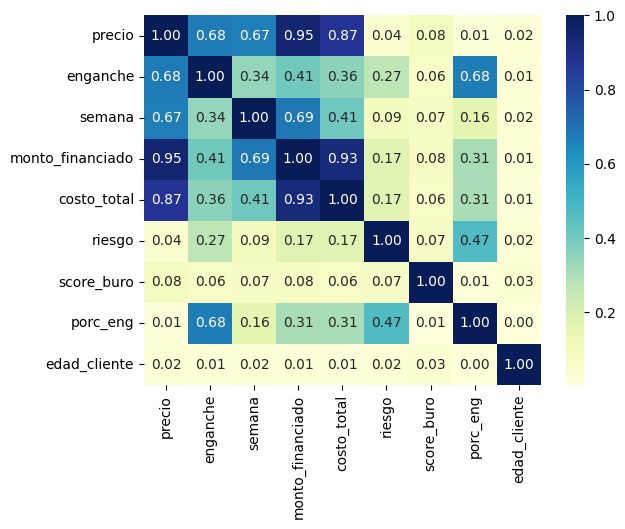

In [9]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")
Heat_Map

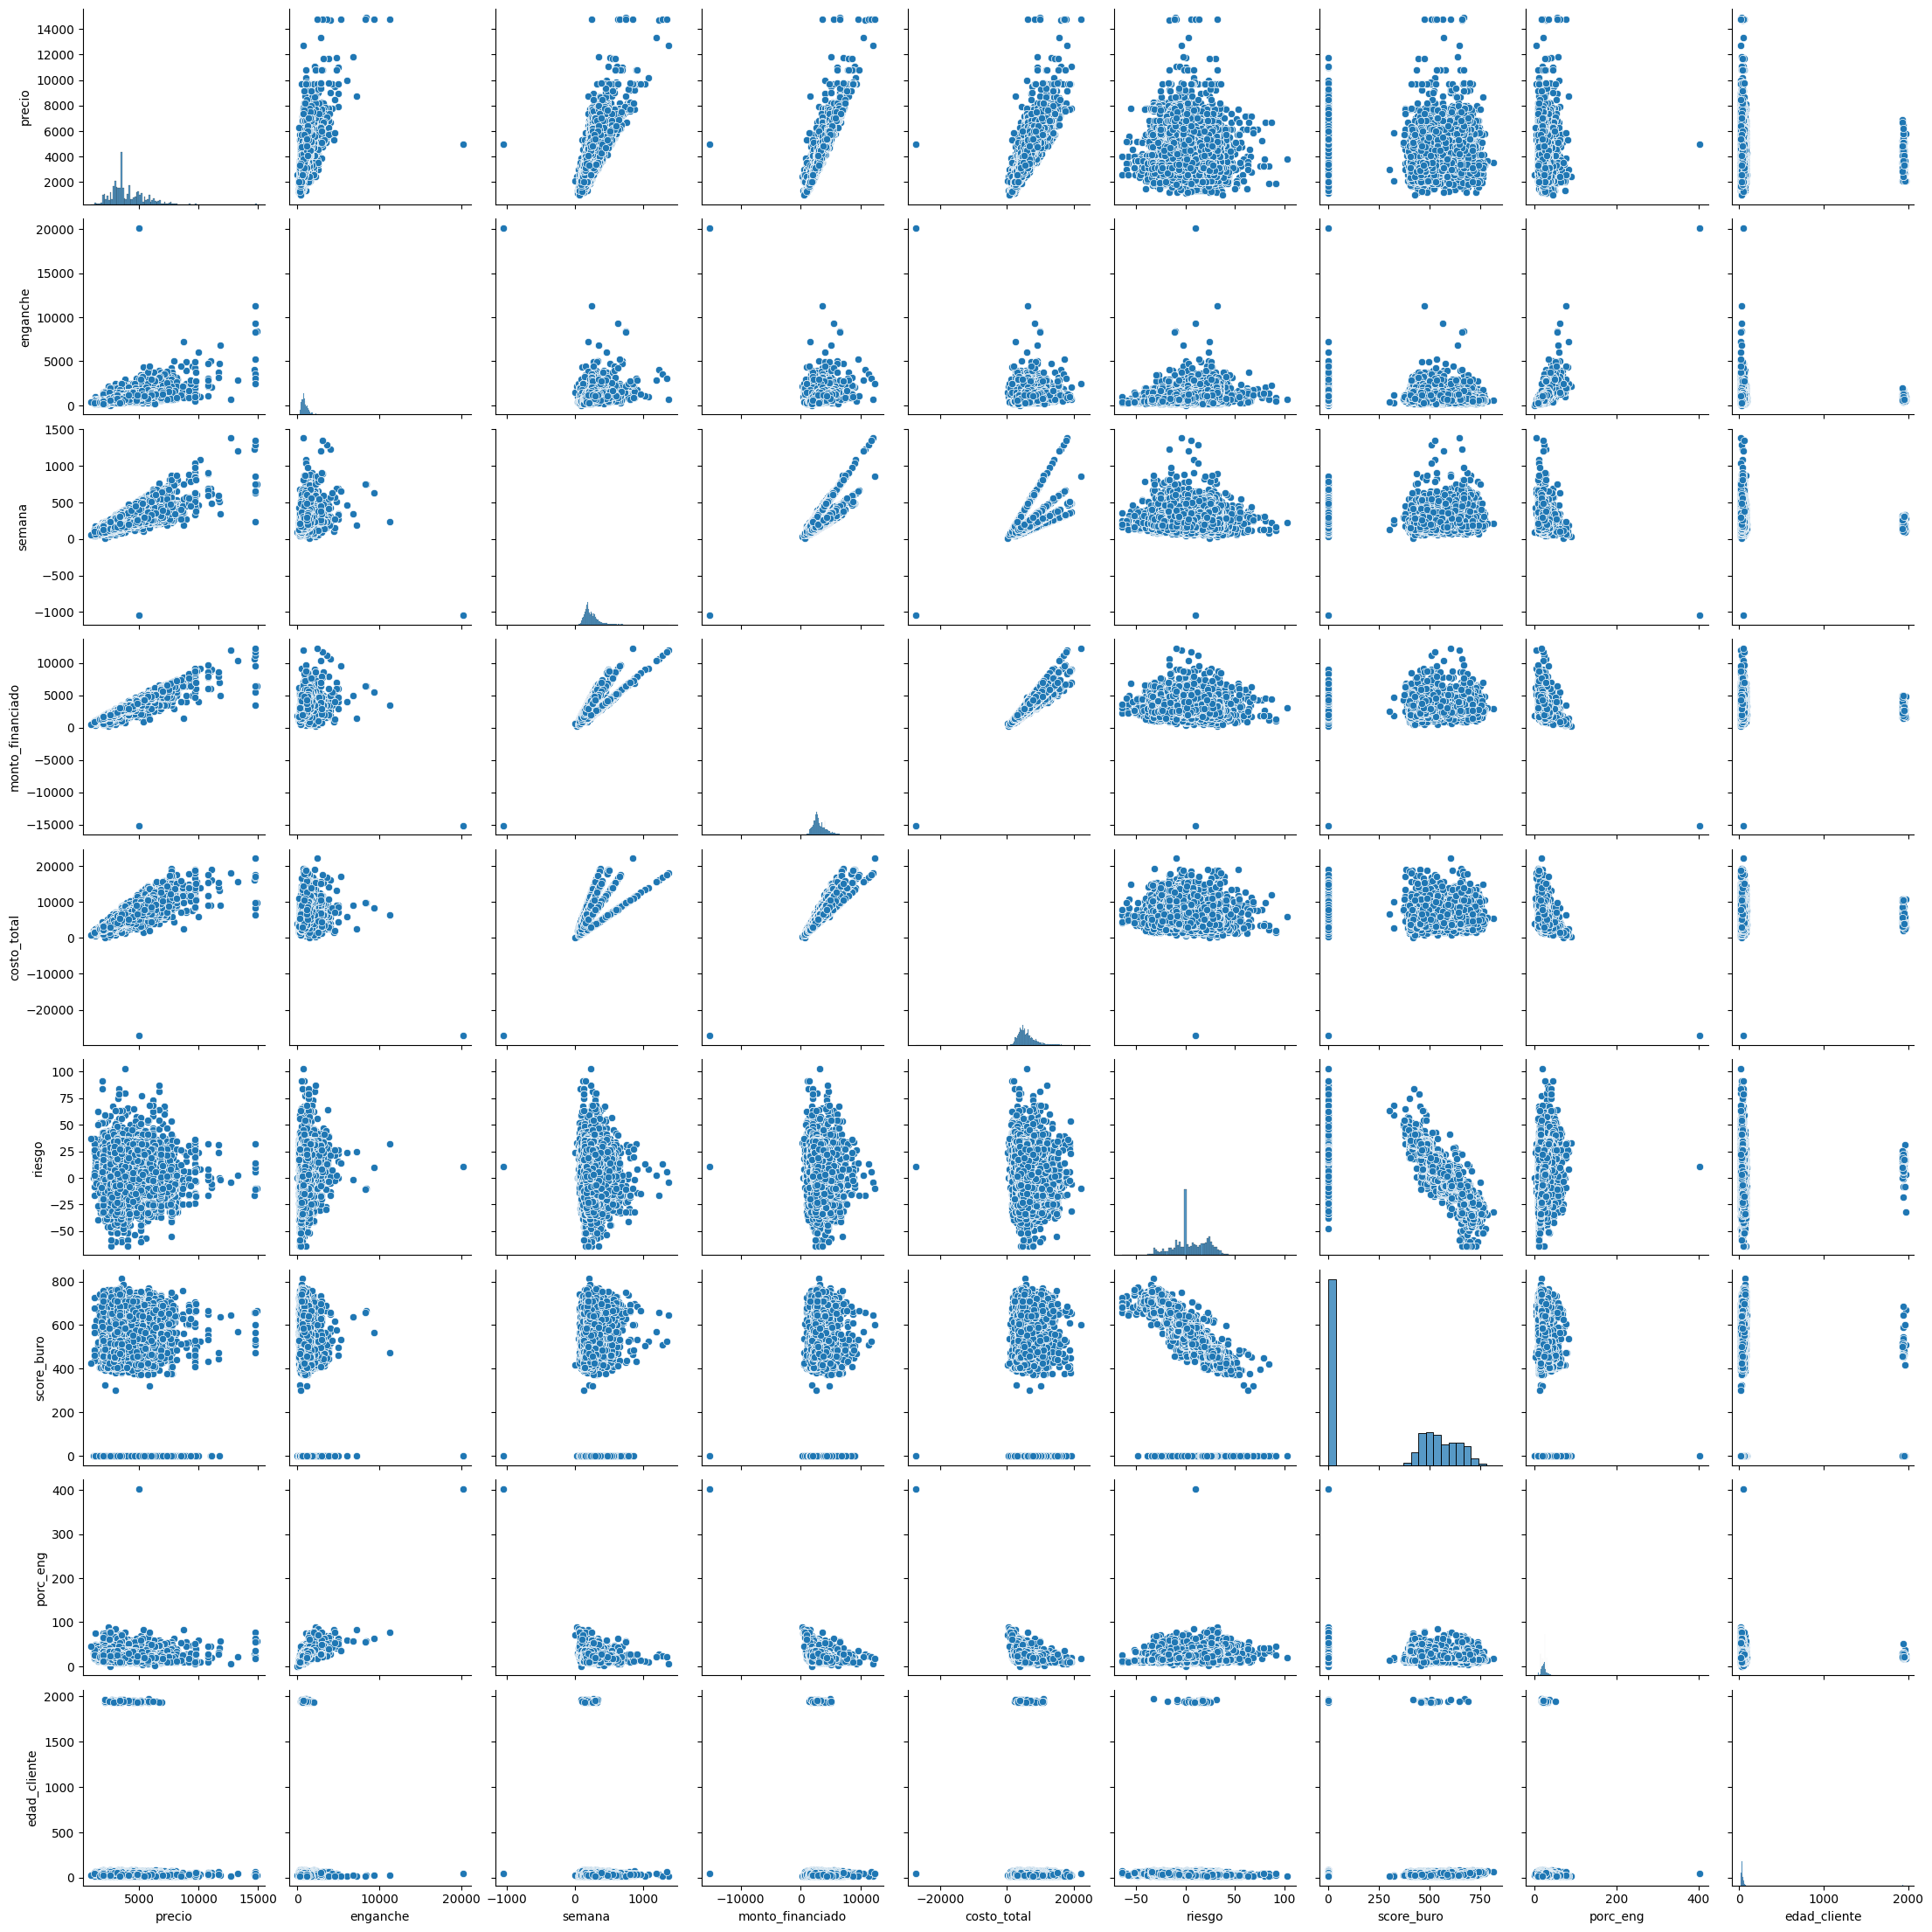

In [10]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df1)

### **porc_eng**

MODELO 1: cuadrático con precio

In [65]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['riesgo']]
Var_Dep= df['porc_eng']

In [66]:
#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

** Usamos las siguientes ecuaciones como funciones de ajuste.**

        y = ax^2 + bx + c


        y = a*exp(bx) + c

In [67]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [68]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['precio'], df1['porc_eng'])

In [69]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.47957259e-07, -1.45754245e-03,  2.63948398e+01])

In [71]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df['riesgo'], df['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [72]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,riesgo
0,22.091963
1,22.091963
2,22.091963
3,22.091963
4,22.091963
...,...
22730,27.692808
22731,25.944555
22732,27.535593
22733,18.697250


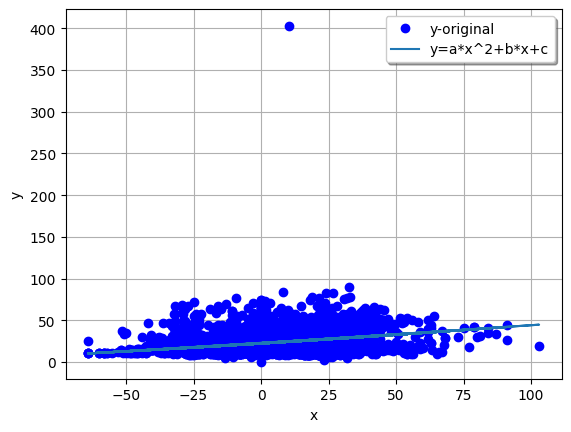

In [73]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [74]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1)
R2

0.22480743303938167

Modelo 2: cubico con precio

In [20]:
def  func1 (x, a, b, c):
     return a*x**3 + b*x + c

In [75]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['riesgo'], df1['porc_eng'])

In [76]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([1.95524244e-04, 1.99053051e-01, 2.20919630e+01])

In [77]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['riesgo'], df1['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a * x ** 3 + b * x + c

In [78]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit2

,riesgo
0,22.091963
1,22.091963
2,22.091963
3,22.091963
4,22.091963
...,...
22730,31.568111
22731,27.215072
22732,31.097498
22733,17.617220


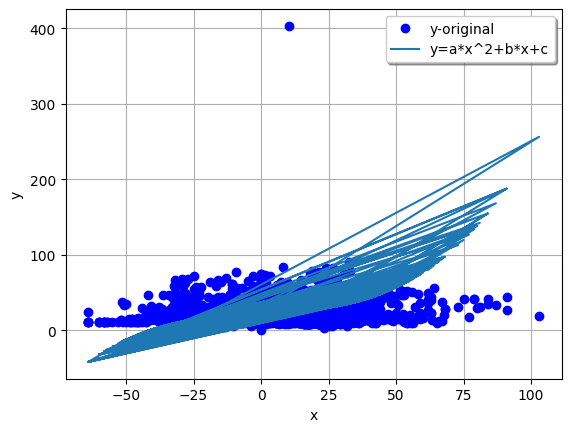

In [79]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [80]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit2)
R2

-0.18876705950832773

Modelo 3: cuadrático con costo_total

In [81]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep1= df1[['costo_total']]
Var_Dep1= df1['porc_eng']

In [82]:
#Redefinimos las variables
x= Vars_Indep1
y= Var_Dep1

In [83]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [84]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df1['costo_total'], df1['porc_eng'])

In [85]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 1.71584518e-07, -3.34057919e-03,  3.56963914e+01])

In [86]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros, _ = curve_fit(func1, df1['costo_total'], df1['porc_eng'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit3 = a * x ** 2 + b * x + c

In [87]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit3

,costo_total
0,29.422149
1,27.393210
2,29.151747
3,29.151747
4,20.774983
...,...
22730,22.534015
22731,22.965025
22732,21.063091
22733,24.292296


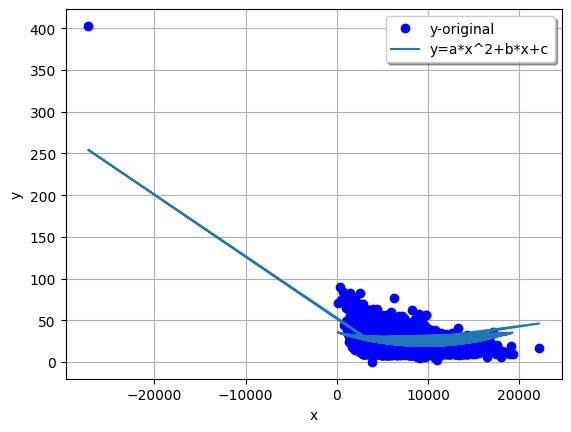

In [88]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit3, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [89]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit3)
R2

0.1694873474459223

Modelo 4:

In [90]:
def func2(x, a, b, c):
    #return a*np.exp(b*x)+c
    return (a*x**3 + b*x**2 + c)/a*x**4 #a*np.sin(x) + b #seno +b*x+c  (a*x**3 + b*x**2 + c)/a*x**4



In [91]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['riesgo'], df['porc_eng'])

In [92]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([ 1.53225250e+01, -1.92032245e+03,  4.21915610e+06])

In [93]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros2, _ = curve_fit(func2, df['riesgo'], df['porc_eng'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ] #seria,c2
#yfit2 = a2*np.exp(x*b2)+c2
yfit4 = (a2*x**3 + b2*x**2 + c2)/a2*x**4

In [94]:
ct = df['riesgo']
ct

0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
22730    27.40
22731    19.00
22732    26.65
22733   -17.35
22734    21.80
Name: riesgo, Length: 22735, dtype: float64

In [95]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit4

,costo_total
0,1.728131e+23
1,1.753346e+24
2,2.428865e+23
3,2.428865e+23
4,7.629226e+26
...,...
22730,1.461352e+26
22731,1.003296e+26
22732,5.678560e+26
22733,1.737532e+29


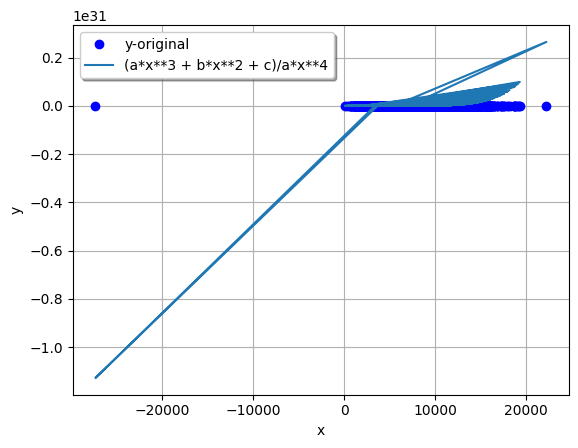

In [96]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit4, label="(a*x**3 + b*x**2 + c)/a*x**4")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [97]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit4)
R2

## 1/ax


-1.1720424539561733e+56

Modelo 5: con seno


In [98]:
def func3(x, a, b):
    return a*np.sin(x) + b #a*np.sin(x) + b #seno +b*x+c  #(a*x**3 + b*x**2 + c)/a*x**4

In [99]:
#Ajustamos los parámetros de la función curve_fit
parametros3, covs3= curve_fit(func3, df['riesgo'], df['porc_eng'])

In [100]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros3

array([ 0.08119146, 23.20631379])

In [101]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros2, _ = curve_fit(func2, df['riesgo'], df['porc_eng'])
a3, b3 = parametros3[ 0 ], parametros3[ 1 ]
#yfit2 = a2*np.exp(x*b2)+c2
yfit5 = a*np.sin(x) + b

In [102]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit5

,costo_total
0,-0.003340
1,-0.003341
2,-0.003341
3,-0.003341
4,-0.003341
...,...
22730,-0.003340
22731,-0.003341
22732,-0.003340
22733,-0.003341


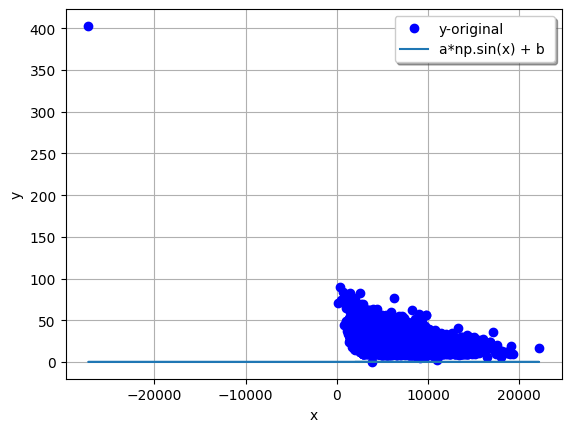

In [103]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit5, label="a*np.sin(x) + b ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [104]:
#Calculamos el coeficiente de determinación del modelo
R3 = r2_score(y, yfit5)
R3

## 1/ax
#a/b*x


-9.574092646487337

Modelo 6

In [51]:
def func4(x, a):
    return 1/a*x

In [52]:
#Ajustamos los parámetros de la función curve_fit
parametros4, covs4= curve_fit(func4, df['costo_total'], df['porc_eng'])

In [53]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros4

array([301.10020833])

In [54]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros4, _ = curve_fit(func4, df['costo_total'], df['porc_eng'])
a4 = parametros4[ 0 ]
#yfit2 = a2*np.exp(x*b2)+c2
yfit6 = 1/a*x

In [55]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit6

,costo_total
0,1.423384e+10
1,1.976922e+10
2,1.493675e+10
3,1.493675e+10
4,4.691895e+10
...,...
22730,3.707828e+10
22731,3.514528e+10
22732,4.498596e+10
22733,1.017456e+11


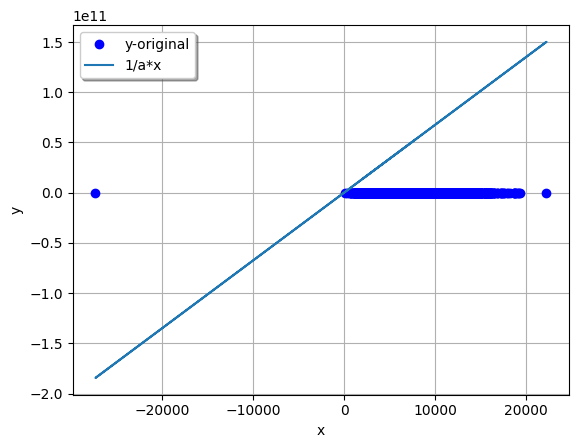

In [56]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit6, label="1/a*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [57]:
#Calculamos el coeficiente de determinación del modelo
R4 = r2_score(y, yfit6) #logaritmica
R4

## 1/ax
#a/b*x

-3.0994549966132183e+19

Modelo 7

In [105]:
#a/b*x
def func5(x, a, b):
    return a/b*x

In [106]:
#Ajustamos los parámetros de la función curve_fit
parametros5, covs5= curve_fit(func5, df['riesgo'], df['porc_eng'])

In [107]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros5

array([ 86.7040539 , 160.11164267])

In [108]:
#Creamos el modelo de predicción con los parámetros obtenidos
parametros5, _ = curve_fit(func5, df['riesgo'], df['porc_eng'])
a5, b5= parametros5[ 0 ], parametros5[ 1 ]
#yfit7 = a2*np.exp(x*b2)+c2
yfit7 = a/b*x

In [109]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit7

,costo_total
0,-0.108172
1,-0.150239
2,-0.113514
3,-0.113514
4,-0.356567
...,...
22730,-0.281781
22731,-0.267091
22732,-0.341877
22733,-0.773229


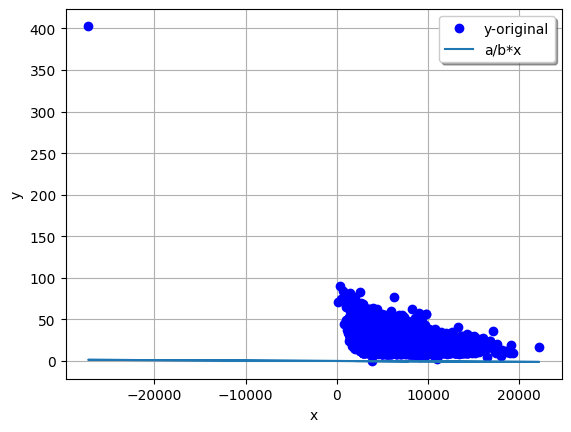

In [110]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit7, label="a/b*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [111]:
#Calculamos el coeficiente de determinación del modelo
R5 = r2_score(y, yfit7)
R5

-9.8046174881455